In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [ ]:
import pandas as pd

df = pd.read_csv("/content/spam.csv", encoding="ISO-8859-1")
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape


(5572, 5)

**1 DATA CLEANING**

In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)


In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# renaming the cols
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.target.value_counts()

,count
target,
ham,4825
spam,747


In [ ]:
# to encode ham and spam into number

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df.target)

In [ ]:
df.target.value_counts()

,count
target,
0,4825
1,747


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# check for duplicated values

df.duplicated().sum()

np.int64(403)

In [ ]:
# remove duplicated

df = df.drop_duplicates(keep="first")
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

**2 .EDA**

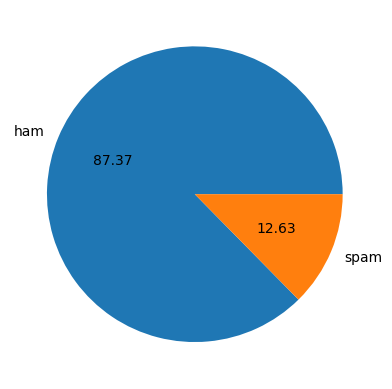

In [ ]:
import matplotlib.pyplot as plt

plt.pie(df.target.value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

In [ ]:
# data is imbalanced

In [ ]:
df['num_character']=df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))



In [ ]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [ ]:
import re

def count_sentences(text):
    sentences = re.split(r'[.!?]+', text)
    sentences = [s.strip() for s in sentences if s.strip() != '']
    return len(sentences)

df['num_sentences'] = df['text'].apply(count_sentences)

In [ ]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [ ]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.304508
std,58.236293,11.068488,1.639932
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,31.000000


In [ ]:
df.rename(columns={"num_character": "num_characters"}, inplace=True)

In [ ]:
# for ham
df[df["target"]==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.099424
std,56.358207,11.116240,1.510418
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,3.000000
max,910.000000,171.000000,31.000000


In [ ]:
# for spam,
df[df["target"]==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.722818
std,30.137753,5.967672,1.792465
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,4.000000
75%,157.000000,28.000000,5.000000
max,224.000000,35.000000,10.000000


<Axes: xlabel='num_characters', ylabel='Count'>

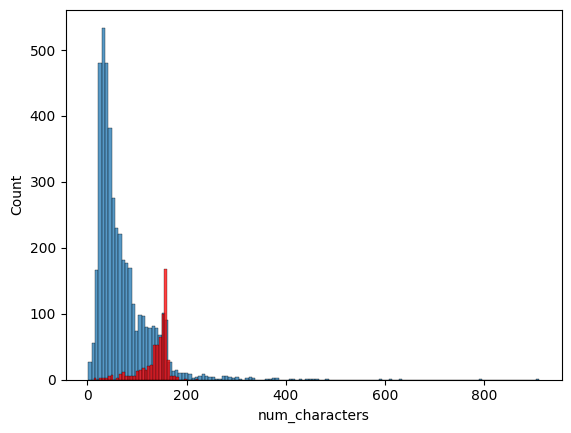

In [ ]:
import seaborn as sns

sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"], color="red")

<Axes: xlabel='num_words', ylabel='Count'>

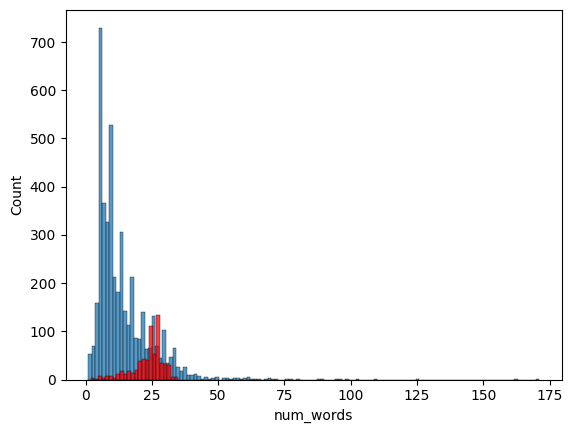

In [ ]:
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"], color="red")

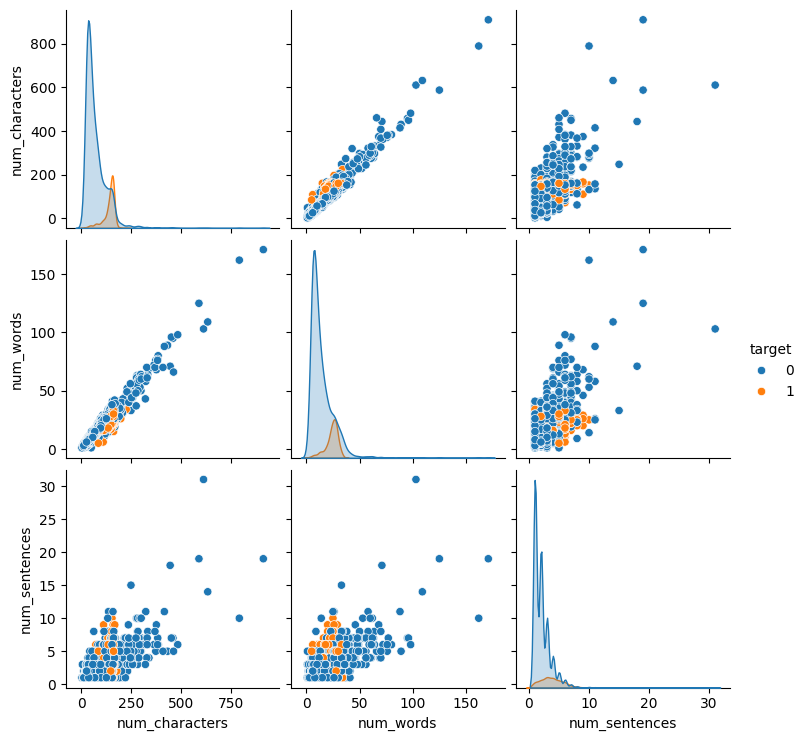

In [ ]:
sns.pairplot(df, hue="target")

<Axes: >

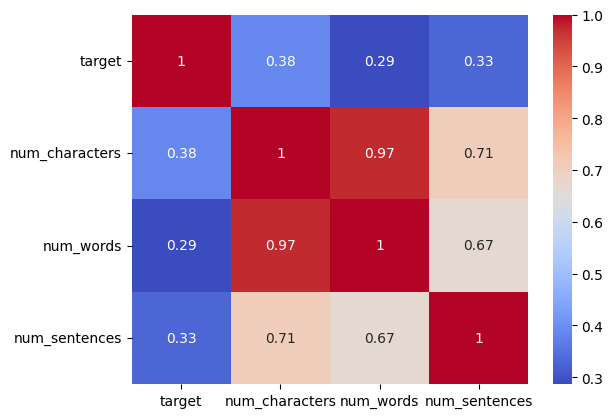

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')


3. DATA PREPROCESSING

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = re.findall(r'\b\w+\b', text)

    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(transform_text("I loved the yt lectures for ml"))


love yt lectur ml


In [ ]:
df["transformed_text"]=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [ ]:
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

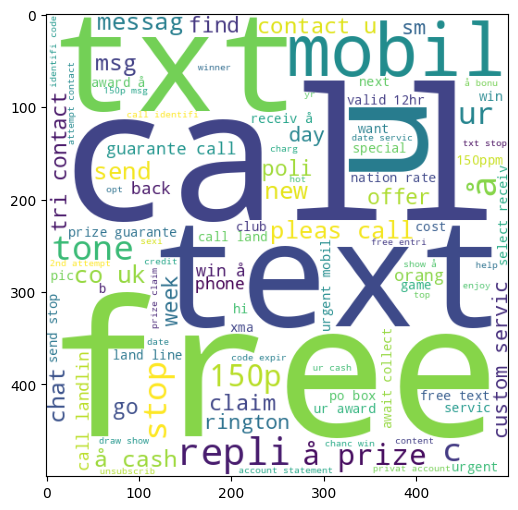

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

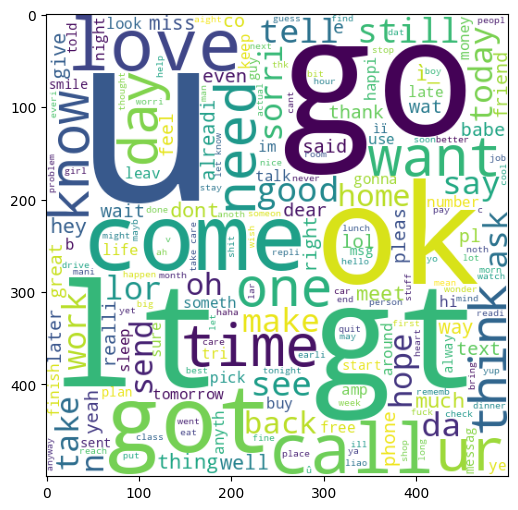

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [ ]:
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

11996

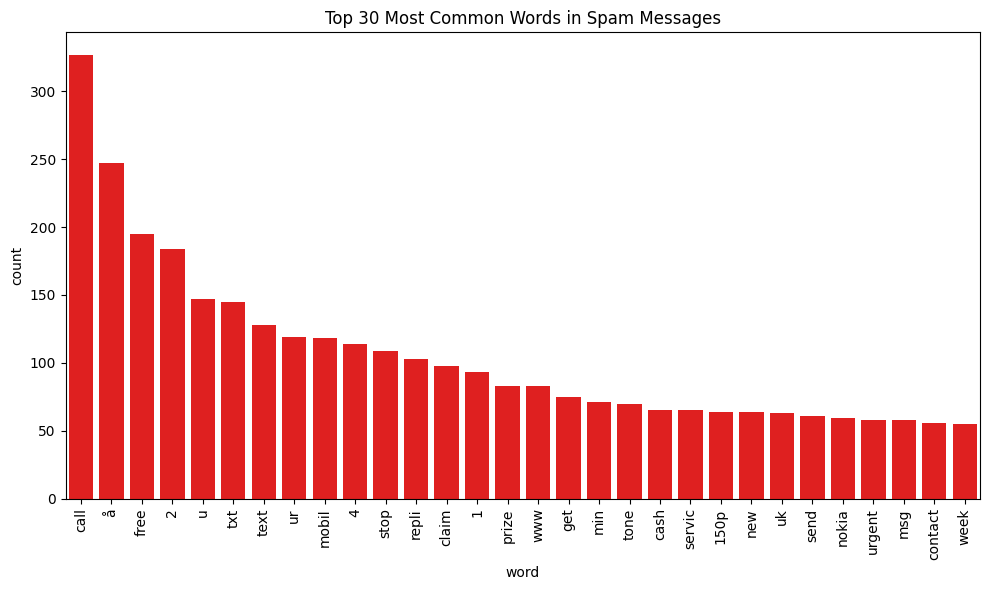

In [ ]:
from collections import Counter
most_common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
common_df = pd.DataFrame(most_common_words, columns=['word', 'count'])


plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=common_df,color='red')
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.tight_layout()
plt.show()

In [ ]:
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

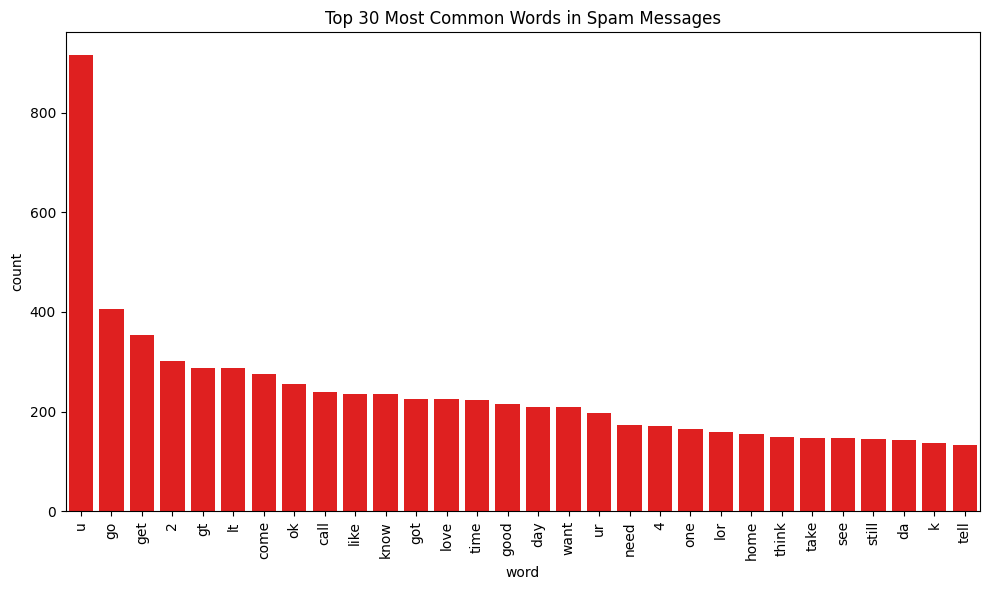

In [ ]:
from collections import Counter
most_common_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
common_dfs = pd.DataFrame(most_common_words, columns=['word', 'count'])


plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=common_dfs,color='red')
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.tight_layout()
plt.show()

In [ ]:
len(ham_corpus)

36506

MODEL BUILDING


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [ ]:
x=tfidf.fit_transform(df["transformed_text"]).toarray()

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print("accuracy score is",accuracy_score(y_test,y_pred1))
print("confusion matrix is",confusion_matrix(y_test,y_pred1))
print("precision score is",precision_score(y_test,y_pred1))

accuracy score is 0.879110251450677
confusion matrix is [[790 106]
 [ 19 119]]
precision score is 0.5288888888888889


In [ ]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print("accuracy score is",accuracy_score(y_test,y_pred2))
print("confusion matrix is",confusion_matrix(y_test,y_pred2))
print("precision score is",precision_score(y_test,y_pred2))

accuracy score is 0.9777562862669246
confusion matrix is [[896   0]
 [ 23 115]]
precision score is 1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print("accuracy score is",accuracy_score(y_test,y_pred3))
print("confusion matrix is",confusion_matrix(y_test,y_pred3))
print("precision score is",precision_score(y_test,y_pred3))

accuracy score is 0.9874274661508704
confusion matrix is [[896   0]
 [ 13 125]]
precision score is 1.0


tfidf --mnb


In [ ]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))